In [12]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import pandas as pd
import json
import numpy as np

from src.functions import plot_pokeball_means
from src.functions import plot_heavy, plot_fast, plot_ultra
from src.functions import plot_status, plot_life

In [13]:
if __name__ == "__main__":
    factory = PokemonFactory("pokemon.json")

    # Open the JSON file
    with open('pokemon.json', 'r') as file:
        # Load JSON data
        data = json.load(file)

    pokemon_names = list(data.keys())

    pokemons = []
    i = 0
    mod = 100
    for pokemon in pokemon_names:
        new_pokemon = factory.create(pokemon, 100, StatusEffect.NONE, 1)
        if i % mod == 0 or new_pokemon.weight > 400:
            pokemons.append(new_pokemon)
        i += 1


In [14]:
    pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]

    stats_df = pd.DataFrame(0.0, index=pokemons, columns=pokeballs)
    error_df = pd.DataFrame(0.0, index=pokemons, columns=pokeballs)


In [15]:
    iterations = 100

    for pokeball in pokeballs:
        for pokemon in pokemons:
            accuracies = []
            for _ in range(iterations):
                catched = int(attempt_catch(pokemon, pokeball)[0])
                catched = catched / iterations
                stats_df.at[pokemon,
                            pokeball] += catched
                accuracies.append(catched)
            error_df.at[pokemon,
                        pokeball] = np.std(accuracies)

    print(stats_df)

    # Remove all pokemons that were never catched
    error_df = error_df[~(stats_df == 0).any(axis=1)]
    stats_df = stats_df[~(stats_df == 0).any(axis=1)]


                                                pokeball  ultraball  fastball  \
<src.pokemon.Pokemon object at 0x770eabd8a898>      0.06       0.12      0.07   
<src.pokemon.Pokemon object at 0x770eb48b56a0>      0.06       0.14      0.22   
<src.pokemon.Pokemon object at 0x770eb48b5080>      0.01       0.05      0.04   
<src.pokemon.Pokemon object at 0x770eb48b5208>      0.32       0.56      0.28   
<src.pokemon.Pokemon object at 0x770eb48b5438>      0.08       0.14      0.09   
<src.pokemon.Pokemon object at 0x770eb48b5278>      0.00       0.00      0.00   
<src.pokemon.Pokemon object at 0x770eb48b5e10>      0.00       0.01      0.01   
<src.pokemon.Pokemon object at 0x770eb48b5320>      0.30       0.61      0.32   
<src.pokemon.Pokemon object at 0x770eb48b56d8>      0.00       0.00      0.00   
<src.pokemon.Pokemon object at 0x770eb48b5a58>      0.00       0.00      0.00   
<src.pokemon.Pokemon object at 0x770eb48b5b38>      0.00       0.01      0.02   
<src.pokemon.Pokemon object 

{'pokeball': 0.1115384615, 'ultraball': 0.1892307692, 'fastball': 0.13, 'heavyball': 0.1046153846}


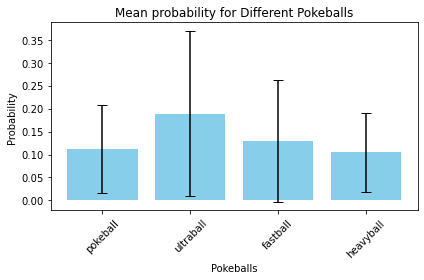

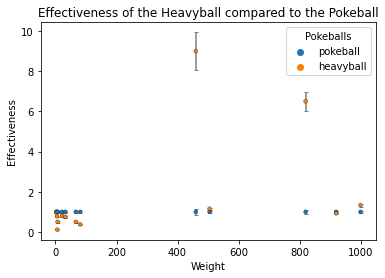

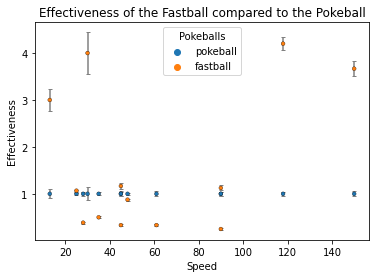

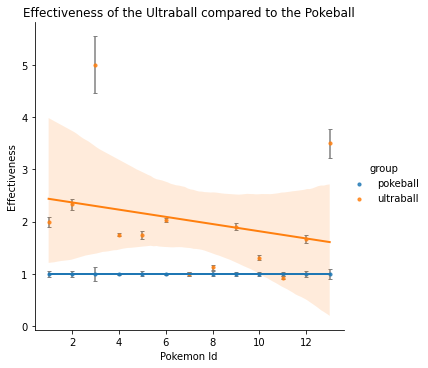

In [16]:
    plot_pokeball_means(pokeballs, pokemons, stats_df)
    plot_heavy(pokeballs, stats_df, error_df)
    plot_fast(pokeballs, stats_df, error_df)
    plot_ultra(pokeballs, stats_df, error_df)

In [17]:
    stats_df = pd.DataFrame(0.0, index=pokemons, columns=pokeballs)
    error_df = pd.DataFrame(0.0, index=pokemons, columns=pokeballs)
    iterations = 100
    noise = 0.05

    for pokeball in pokeballs:
        for pokemon in pokemons:
            accuracies = []
            for _ in range(iterations):
                catched = attempt_catch(pokemon, pokeball, noise)[1]
                accuracies.append(catched)

            stats_df.at[pokemon,
                        pokeball] = np.mean(accuracies)
            error_df.at[pokemon,
                        pokeball] = np.std(accuracies)

    print(stats_df)


                                                pokeball  ultraball  fastball  \
<src.pokemon.Pokemon object at 0x770eabd8a898>  0.058279   0.117683  0.058446   
<src.pokemon.Pokemon object at 0x770eb48b56a0>  0.078133   0.156202  0.312966   
<src.pokemon.Pokemon object at 0x770eb48b5080>  0.032599   0.065149  0.032749   
<src.pokemon.Pokemon object at 0x770eb48b5208>  0.293058   0.588736  0.294318   
<src.pokemon.Pokemon object at 0x770eb48b5438>  0.078389   0.155665  0.077517   
<src.pokemon.Pokemon object at 0x770eb48b5278>  0.003886   0.007849  0.003925   
<src.pokemon.Pokemon object at 0x770eb48b5e10>  0.003923   0.007828  0.003900   
<src.pokemon.Pokemon object at 0x770eb48b5320>  0.338233   0.665899  0.332244   
<src.pokemon.Pokemon object at 0x770eb48b56d8>  0.003892   0.007806  0.003902   
<src.pokemon.Pokemon object at 0x770eb48b5a58>  0.003907   0.007806  0.003916   
<src.pokemon.Pokemon object at 0x770eb48b5b38>  0.003920   0.007791  0.015680   
<src.pokemon.Pokemon object 

{'pokeball': 0.0629273274, 'ultraball': 0.1255290489, 'fastball': 0.0904743415, 'heavyball': 0.0742089974}


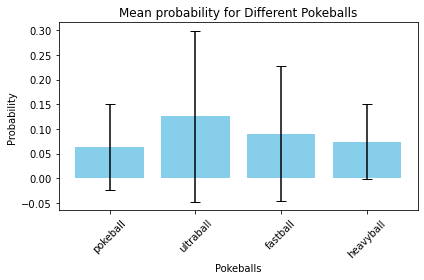

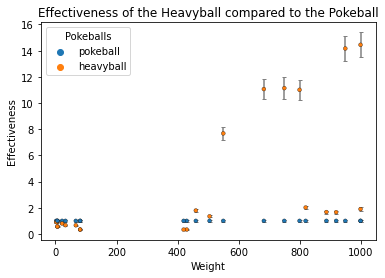

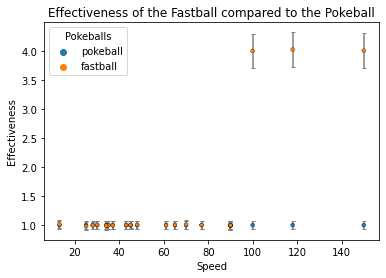

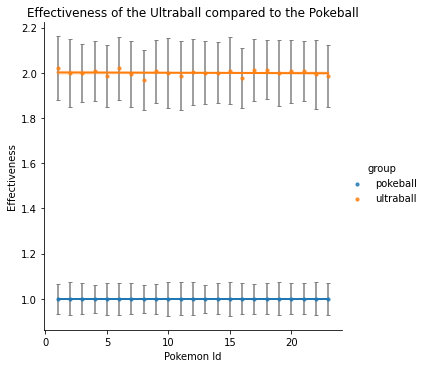

In [18]:
    plot_pokeball_means(pokeballs, pokemons, stats_df)
    plot_heavy(pokeballs, stats_df, error_df)
    plot_fast(pokeballs, stats_df, error_df)
    plot_ultra(pokeballs, stats_df, error_df)
